## Aca vamos a calcular el fdisk en funcion del radio

Vtot/Vstr (r50) =  1.211469


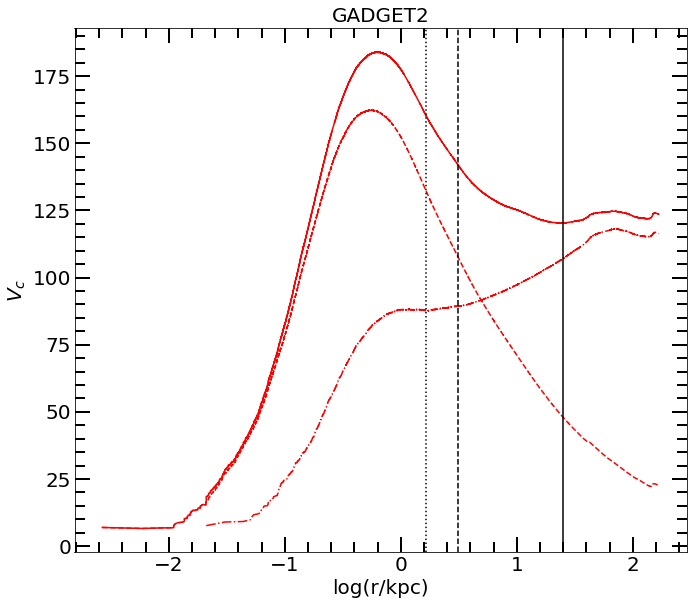

Vtot/Vstr (r50) =  1.3077571


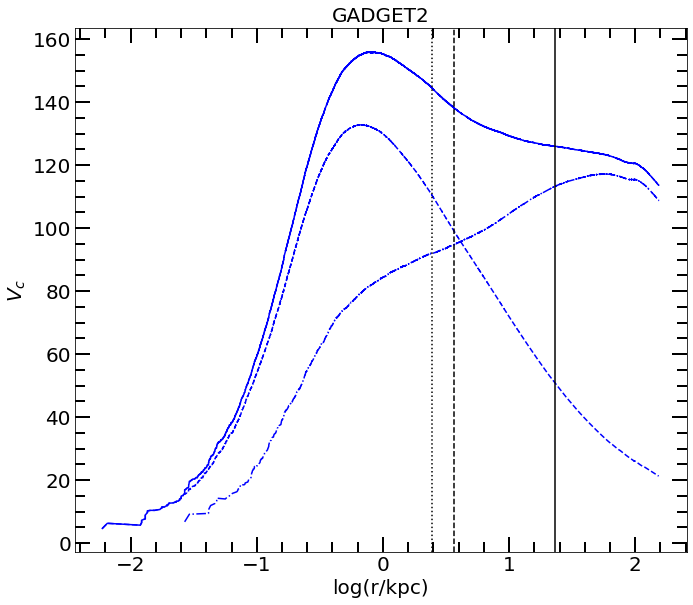

Vtot/Vstr (r50) =  1.6696998


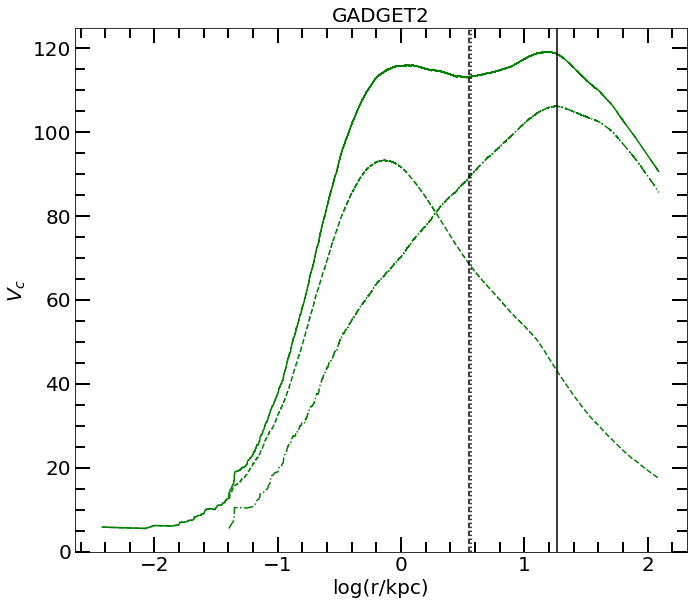

In [15]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np

colors = ('r','b','g')
vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')

Rd = np.array([3.122,3.65,3.568])

h =0.732
G = 4.299e-6
a0 =1
H0 = h*100
omega_lambda = 0.716
omega_matter = 0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

# path = '/home/omarioni/'
path = '/home/ornela/SimCLUES/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

#     path = '/mnt/is2/alejandro/ornella/'    
snap = h5py.File(path + 'outputs_1/snap_496.h5py', 'r')

for i in range(0,3):
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'][()]
    r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'][()]

    pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'][()]
    vel  = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Velocities'][()]

    pgas = snap['subhalo_0'+ str('%s' %vector[i]) + '/Gas/Coordinates'][()]
    mgas = snap['subhalo_0'+ str('%s' %vector[i]) + '/Gas/Masses'][()]
    
    pdrk = snap['subhalo_0'+ str('%s' %vector[i]) + '/Drk/Coordinates'][()]
    mdrk = snap['subhalo_0'+ str('%s' %vector[i]) + '/Drk/Masses'][()]

    z = a0/aexp[0] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
#     time = tiempo.conv(z, h, omega_lambda, omega_matter)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[0]/h
    ystr = (pstr[:,1]-cm[1])*aexp[0]/h
    zstr = (pstr[:,2]-cm[2])*aexp[0]/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])*aexp[0]/h
    ygas = (pgas[:,1]-cm[1])*aexp[0]/h
    zgas = (pgas[:,2]-cm[2])*aexp[0]/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])*aexp[0]/h
    ydrk = (pdrk[:,1]-cm[1])*aexp[0]/h
    zdrk = (pdrk[:,2]-cm[2])*aexp[0]/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vel[:,0] *np.sqrt(aexp[0]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[0]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[0]) + Ht *zstr/1000.
#----------------------masas----------------------------
    mstr = mstr*1e10/h
    mgas = mgas*1e10/h
    mdrk = mdrk*1e10/h

    r200 = r200*aexp[0]/h

#     print 'r200 =', r200
    rgal=0.15*r200

    limit    = np.where(rstr<rgal)
    r_sort   = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])

    limit_str   = np.where(rstr<r200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<r200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<r200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])


    Mgal_str = np.cumsum((mstr[limit])[r_indice])

    Mc_str = np.cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]

    razon       = Mgal_str/M_gal
    cincuenta,    = np.where(razon < 0.50)

    r50 = r_sort[cincuenta][-1]
#--------------------------------------------------------------       
    rtot = np.concatenate([rstr, rgas, rdrk])
    mtot = np.concatenate([mstr, mgas, mdrk])

    limit_tot   = np.where(rtot<r200)
    rtot_sort   = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])

    #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------
    rtot = rtot_sort
    rstr = rstr_sort
    rgas = rgas_sort
    rdrk = rdrk_sort
    
    Vtot = np.sqrt((G*Mc_tot)/rtot)
    Vstr = np.sqrt((G*Mc_str)/rstr)
    Vgas = np.sqrt((G*Mc_gas)/rgas)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk)

    dtot = np.absolute(r50-rtot)
    dstr = np.absolute(r50-rstr)
    lmax = Vtot[np.argmin(dtot)]
    lmin = Vstr[np.argmin(dstr)]
    
    print ('Vtot/Vstr (r50) = ', lmax/lmin)
#----------------------------------------------------------------------------------------


    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))# sharey=True, sharex=True)
            #                        gridspec_kw = {'height_ratios':[3,1,3,1]})
    fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)


    ax.plot(np.log10(rtot), Vtot, '-', lw=1.5, color=colors[i], label = 'Total')
    ax.plot(np.log10(rstr), Vstr, '--',lw=1.5, color=colors[i], label = 'Stars')
    ax.plot(np.log10(rdrk), Vdrk, '-.',lw=1.5, color=colors[i], label =' Dark Matter')
    ax.axvline(x=np.log10(r50), lw=1.5, ls = ':', color='k')
    ax.axvline(x=np.log10(rgal),lw=1.5, color='k')
    ax.axvline(x=np.log10(Rd[i]),lw=1.5, ls = '--', color='k')
#     ax.set_ylim(1.5,2.3)
#     ax.set_xlim(0,30)
    ax.set_ylabel(r'$V_c$', fontsize=20)
    ax.set_xlabel(r'log(r/kpc)',fontsize=20)
    # ax[0].set_xticklabels([])
    ax.minorticks_on()
    ax.tick_params( labelsize=20)
    ax.tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax.set_title('GADGET2', loc='center', fontsize=20)

    plt.show()

Vtot/Vstr (r50) =  1.0112946


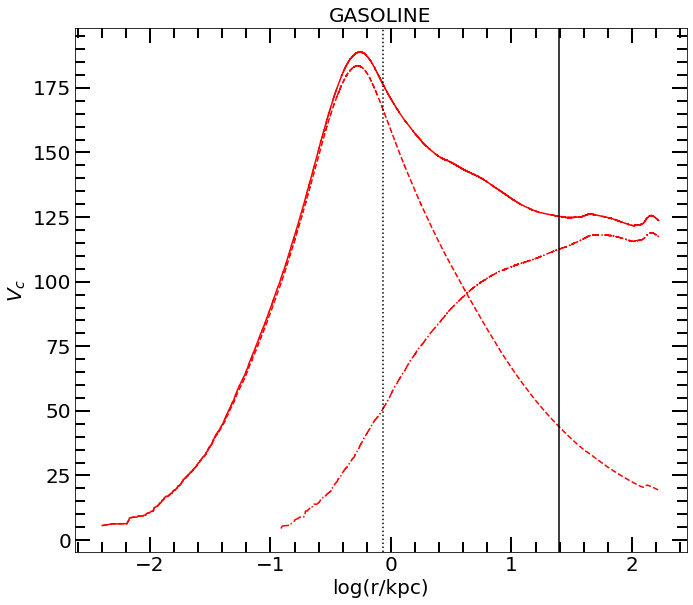

Vtot/Vstr (r50) =  1.0474052


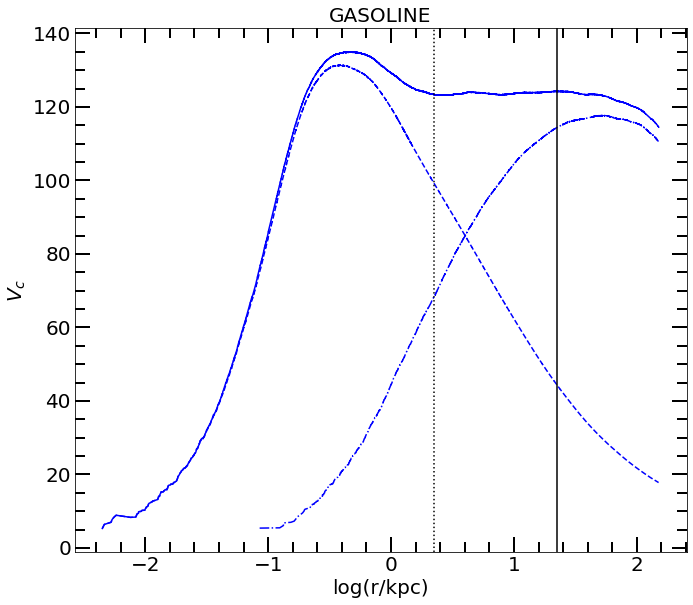

Vtot/Vstr (r50) =  1.1186639


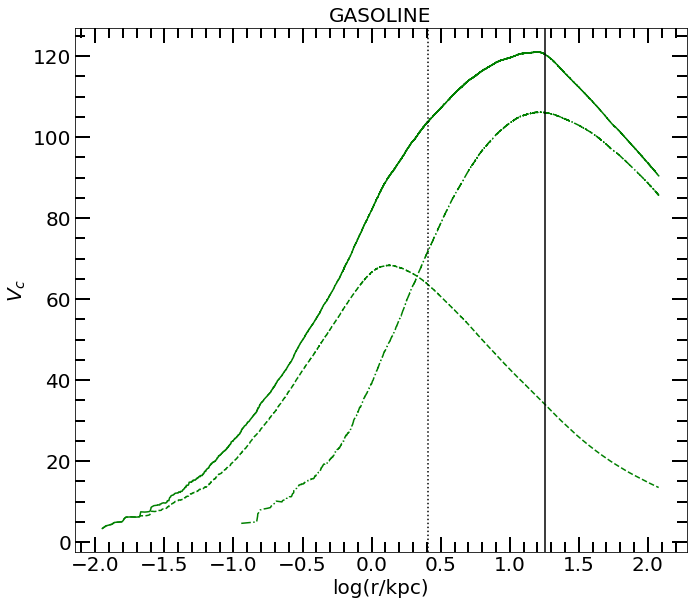

In [17]:
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np

colors = ('r','b','g')

G = 4.299e-6
a0= 1.
vector2 = ('M31','MW','M33')
vector = (1,2,4)

path = '/home/ornela/SimCLUES/'

snap = h5py.File(path + 'Gasoline/outputs2/snap_1024.h5py', 'r')

for i in range(0,3):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'][()]
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'][()]
    time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'][()]
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'][()]
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'][()]

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Masses'][()]
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'][()]

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'][()]
    mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'][()]

    pdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Coordinates'][()]
    mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'][()]

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0]) #*aexp
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vel[:,0] 
    v_y = vel[:,1] 
    v_z = vel[:,2]

#------------------------------------------------
    r200 = r200*aexp

#     print 'r200=', r200
    rgal=0.15*r200

    limit    = np.where(rstr<rgal)
    r_sort   = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])

    limit_str   = np.where(rstr<r200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<r200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<r200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])


    Mgal_str = np.cumsum((mstr[limit])[r_indice])

    Mc_str = np.cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]

    razon       = Mgal_str/M_gal
    cincuenta,    = np.where(razon < 0.50)

    r50 = r_sort[cincuenta][-1]

#--------------------------------------------------------------       
    rtot= np.concatenate([rstr, rgas, rdrk])
    mtot= np.concatenate([mstr, mgas, mdrk])

    limit_tot = np.where(rtot<r200)
    rtot_sort = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])

#--------------------------------------------------------------
    Mc_tot = Mc_tot[1:]
    Mc_str = Mc_str[1:]
    Mc_gas = Mc_gas[1:]
    Mc_drk = Mc_drk[1:]

    rtot = rtot_sort[1:]
    rstr = rstr_sort[1:]
    rgas = rgas_sort[1:]
    rdrk = rdrk_sort[1:]

    rgal = rgal
    
    Vtot = np.sqrt((G*Mc_tot)/rtot)
    Vstr = np.sqrt((G*Mc_str)/rstr)
    Vgas = np.sqrt((G*Mc_gas)/rgas)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk)
    
    dtot = np.absolute(r50-rtot)
    dstr = np.absolute(r50-rstr)
    lmax = np.log10(Vtot[np.argmin(dtot)])
    lmin = np.log10(Vstr[np.argmin(dstr)])
    
    print ('Vtot/Vstr (r50) = ', lmax/lmin)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))# sharey=True, sharex=True)
            #                        gridspec_kw = {'height_ratios':[3,1,3,1]})
    fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)


    ax.plot(np.log10(rtot), Vtot, '-', lw=1.5, color=colors[i], label = 'Total')
    ax.plot(np.log10(rstr), Vstr, '--',lw=1.5, color=colors[i], label = 'Stars')
    ax.plot(np.log10(rdrk), Vdrk, '-.',lw=1.5, color=colors[i], label =' Dark Matter')
    ax.axvline(x=np.log10(r50), lw=1.5, ls = ':', color='k')
    ax.axvline(x=np.log10(rgal),lw=1.5, color='k')
#     ax.axvline(x=np.log10(Rd[i]),lw=1.5, ls = '--', color='k')
#     ax.set_ylim(1.5,2.3)
#     ax.set_xlim(0,30)
    ax.set_ylabel(r'$V_c$', fontsize=20)
    ax.set_xlabel(r'log(r/kpc)',fontsize=20)
    # ax[0].set_xticklabels([])
    ax.minorticks_on()
    ax.tick_params( labelsize=20)
    ax.tick_params('both', length=10, width=2,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=15, width=2,which='major', direction='in', right=True,top=True)
    ax.set_title('GASOLINE', loc='center', fontsize=20)

    plt.show()